<a href="https://colab.research.google.com/github/LizaCerinza/NPL/blob/main/Clase11%2C12%2C13%2C14_ngramas%2Ccolocaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

In [ ]:
md_bigramas = list(bigrams(text1))
fdist = FreqDist(md_bigramas)
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

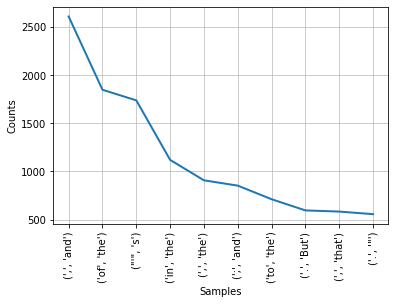

In [ ]:
fdist.plot(10)


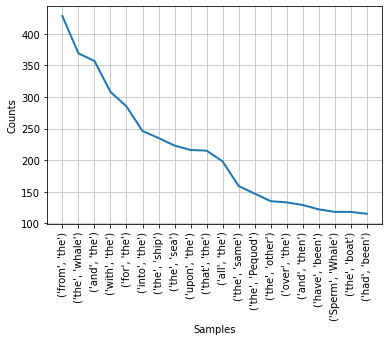

In [ ]:
#Filtrado de bigramas
threshold = 2
filter_bigrams = [bigram for bigram in md_bigramas if len(bigram[0])>threshold and len(bigram[1])>threshold] 
filter_dist = FreqDist(filter_bigrams)
filter_dist.plot(20)


In [ ]:
#tri-gramas
from nltk.util import ngrams
md_trigrams = list(ngrams(text1,3))
fdist1 = FreqDist(md_trigrams)
fdist1.most_common(10)

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

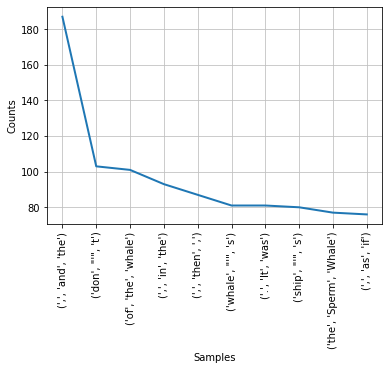

In [ ]:
fdist1.plot(10)

In [ ]:
#Colocaciones 
#instanciar un data frame

filtered_words = [word for word in text1 if len(word)>threshold]
filtered_word_dist = FreqDist(filtered_words)
df = pd.DataFrame()      
df['bi_grams'] = list(set(filter_bigrams))
df['word_0'] = df['bi_grams'].apply(lambda x: x[0])
df['word_1'] = df['bi_grams'].apply(lambda x: x[1])
df['bi_gram_freq'] = df['bi_grams'].apply(lambda x: filter_dist[x])
df['word_0_freq'] = df['word_0'].apply(lambda x: filtered_word_dist[x])
df['word_1_freq'] = df['word_1'].apply(lambda x: filtered_word_dist[x])



In [ ]:
df


bi_grams      word_0  ... word_0_freq  word_1_freq
0                (the, growing)         the  ...       13721            9
1                    (men, who)         men  ...         236          319
2               (the, whitened)         the  ...       13721            2
3                 (almost, see)      almost  ...         186          253
4                 (Queen, Anne)       Queen  ...          14            2
...                         ...         ...  ...         ...          ...
67937              (that, hole)        that  ...        2982           44
67938  (tremendous, apparition)  tremendous  ...           9            9
67939            (sudden, roll)      sudden  ...          42           16
67940          (the, commonest)         the  ...       13721            1
67941        (mightiest, whale)   mightiest  ...           6          906

[67942 rows x 6 columns]

In [ ]:
# PMI información mutua punto a punto 
df['PMI'] = df[['bi_gram_freq','word_0_freq', 'word_1_freq']].apply(lambda x: np.log2(x.values[0]/(x.values[1]*x.values[1])), axis =1)


In [ ]:
df.sort_values(by = 'PMI', ascending= False)

bi_grams    word_0  ...        PMI  log(bi_gram_freq)
16987       (Catskill, eagle)  Catskill  ...   0.000000                0.0
49351            (baker, and)     baker  ...   0.000000                0.0
41749           (WAVING, HIS)    WAVING  ...   0.000000                0.0
64351          (waxes, brave)     waxes  ...   0.000000                0.0
15589           (subtly, and)    subtly  ...   0.000000                0.0
...                       ...       ...  ...        ...                ...
34115         (the, unmarred)       the  ... -27.488196                0.0
34110            (the, piers)       the  ... -27.488196                0.0
34054       (the, permitting)       the  ... -27.488196                0.0
34053  (the, picturesqueness)       the  ... -27.488196                0.0
0              (the, growing)       the  ... -27.488196                0.0

[67942 rows x 8 columns]

In [ ]:
#Grááficas interactivas
df['log(bi_gram_freq)'] = df['bi_gram_freq'].apply(lambda x: np.log2(x))
fig = px.scatter(x = df['PMI'].values, y = df['log(bi_gram_freq)'], color = df['PMI']+ df['log(bi_gram_freq)'],
                 hover_name = df['bi_grams'].values, width = 600, height = 600, labels = {'x':'PMI', 'y': 'log(bi_gram_freq)'})
fig.show()


In [ ]:
#NLTK para colocaciones 
from nltk.collocations import *
bigram_mesure = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text1)

In [ ]:
finder.apply_freq_filter(20)
finder.nbest(bigram_mesure.pmi, 10)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]

In [ ]:
# Ejemplo colocaciones textos en Español
nltk.download('cess_esp')
corpus = nltk.corpus.cess_esp.sents()
corpus
flatten_corpus = [w for l in corpus for w in l]

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


In [ ]:
print(flatten_corpus[:50])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.', 'Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto']


In [ ]:
finder_es = BigramCollocationFinder.from_documents(corpus)
finder_es.apply_freq_filter(10)
finder_es.nbest(bigram_mesure.pmi,10)


[('señora', 'Aguirre'),
 ('secretario', 'general'),
 ('elecciones', 'generales'),
 ('campaña', 'electoral'),
 ('quiere', 'decir'),
 ('Se', 'trata'),
 ('segunda', 'vuelta'),
 ('director', 'general'),
 ('primer', 'ministro'),
 ('primer', 'lugar')]